In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('Ti.csv')


In [32]:
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [33]:
#data type
print("\nData types:")
print(df.dtypes)


Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [34]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=False)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [35]:
# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=False)




0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [37]:
# Drop Cabin column (too many nulls)
df.drop(columns=['Cabin'], inplace=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [38]:
# One-hot encode 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [39]:
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print("\nNormalized Age and Fare:")
print(df[['Age', 'Fare']].head())



Normalized Age and Fare:
        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


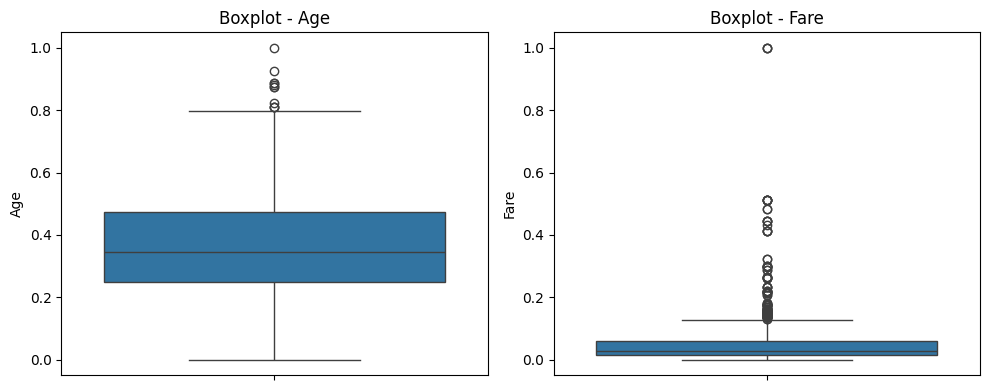

In [40]:
# Plot boxplots for Age and Fare
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Boxplot - Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title("Boxplot - Fare")

plt.tight_layout()
plt.show()


In [41]:
# Remove extreme outliers using 99th percentile
age_limit = df['Age'].quantile(0.99)
fare_limit = df['Fare'].quantile(0.99)

df = df[(df['Age'] <= age_limit) & (df['Fare'] <= fare_limit)]

print("\nAfter outlier removal, shape:", df.shape)



After outlier removal, shape: (697, 13)


In [42]:

print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          523
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64


In [43]:
print("\nFinal cleaned data:")
print(df.head())


Final cleaned data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  0.271174      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.472229      1      0   
2                             Heikkinen, Miss. Laina  0.321438      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.434531      1      0   
4                           Allen, Mr. William Henry  0.434531      0      0   

             Ticket      Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171  0.014151   NaN      True       False        True  
1          PC 17599  0.139136   C85     False       False       False  
2  STON/O2. 3101282  0.015469   NaN     False       False        